In [1]:
# IMport the required libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist

In [2]:
# Load the datset
train = pd.read_excel("usecase-1.xlsx")

In [3]:
# Get the train Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20409 entries, 0 to 20408
Data columns (total 19 columns):
NewID                         20409 non-null int64
request_no                    20409 non-null object
bill_amount                   20409 non-null int64
claim Status                  20409 non-null object
No. of Tour Days              20409 non-null float64
Mode of Transport             20409 non-null object
Distance in KMs               20409 non-null float64
Tier                          20409 non-null object
date_of_joining               20409 non-null object
date_of_birth                 20409 non-null object
CostCentre_Code               20408 non-null object
Travel_Purpose_Description    20409 non-null object
IC                            20409 non-null object
joinmonth                     20409 non-null object
joindate                      20409 non-null int64
joinyear                      20409 non-null int64
birthmonth                    20409 non-null object
birthdate

In [4]:
#check for any missing values
train.apply(lambda x: sum(x.isnull()),axis=0)

NewID                         0
request_no                    0
bill_amount                   0
claim Status                  0
No. of Tour Days              0
Mode of Transport             0
Distance in KMs               0
Tier                          0
date_of_joining               0
date_of_birth                 0
CostCentre_Code               1
Travel_Purpose_Description    0
IC                            0
joinmonth                     0
joindate                      0
joinyear                      0
birthmonth                    0
birthdate                     0
birthyear                     0
dtype: int64

There is only one data point which is null we can drop that data point.

In [5]:
# Summary statistics of quantitative variables and categorical variables
train.describe()

,NewID,bill_amount,No. of Tour Days,Distance in KMs,joindate,joinyear,birthdate,birthyear
count,20409.000000,20409.000000,20409.000000,20409.000000,20409.000000,20409.000000,20409.000000,20409.00000
mean,17633.458229,267.014699,6.636729,27.945558,13.098829,2009.308540,14.903033,1981.86991
std,11567.337163,483.979355,10.139416,76.945590,9.406839,6.907854,8.975409,8.74302
min,1.000000,1.000000,0.500000,1.000000,1.000000,1976.000000,1.000000,1954.00000
25%,7303.000000,100.000000,2.000000,8.000000,4.000000,2007.000000,7.000000,1977.00000
50%,17683.000000,160.000000,3.500000,14.000000,12.000000,2011.000000,15.000000,1984.00000
75%,27875.000000,300.000000,7.000000,25.000000,20.000000,2014.000000,23.000000,1988.00000
max,37834.000000,28500.000000,245.000000,5000.000000,31.000000,2017.000000,31.000000,1998.00000


In [6]:
train.describe(include=["object"])

,request_no,claim Status,Mode of Transport,Tier,date_of_joining,date_of_birth,CostCentre_Code,Travel_Purpose_Description,IC,joinmonth,birthmonth
count,20409,20409,20409,20409,20409,20409,20408,20409,20409,20409,20409
unique,14832,10,4,20,3118,5743,2989,5,57,12,12
top,17E02MIPI014560,Approved by SSC,Auto,S&E,Jul 10 2015 12:00AM,Jun 7 1983 12:00AM,63100,Business Trip,CONS,Jul,Jun
freq,14,19907,12906,5950,155,59,158,14999,6036,3825,2483


In [7]:
# Drop the columns
cols=['NewID','request_no','CostCentre_Code','date_of_joining','date_of_birth']
for i in cols:
    train=train.drop([i],axis=1)


In [8]:
# Conver the object columns into category
cols=['joinmonth','birthmonth','claim Status','Mode of Transport','Tier','Travel_Purpose_Description','IC','joinmonth','joinyear','birthmonth','birthyear']
for i in cols:
    train[i] = train[i].astype('category',copy=False)

In [10]:
# Drop NA value
train=train.dropna()

In [11]:
#converting Independent Categorical into Numeriacal by creating Dummy variables
dataset_dummy = pd.get_dummies(train)

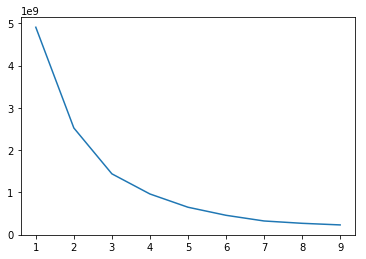

In [12]:
# K mean model building
from sklearn.cluster import KMeans

# Choosing the optimal k
k_range = range(1,10)
# Try clustering the data for k values ranging 1 to 10
k_means_var = [KMeans(n_clusters = k).fit(dataset_dummy) for k in k_range]
centroids = [X.cluster_centers_ for X in k_means_var]

k_euclid = [cdist(dataset_dummy, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]

# Calculate within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# Visualize the elbow method for determining k
import matplotlib.pyplot as plt
plt.plot(k_range, wcss)
plt.show()

In [13]:
# Based cluster centroid and the data point distance they are sorted from max to least.
dist=np.argsort(np.max(KMeans(n_clusters=8).fit_transform(dataset_dummy), axis=1))

In [14]:
kmeans_model=KMeans(n_clusters=8).fit(dataset_dummy)

In [15]:
# Outliers in the data.
outlierpoints=train.iloc[list(dist[0:6]),:]

Text(0.5,1,'KMean Clustering Suspicious Points')

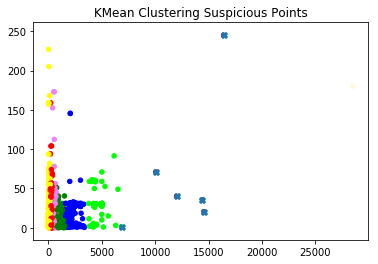

In [18]:
colormap = np.array(['red', 'lime', 'blue','brown','cornsilk','yellow','green','violet'])


plt.scatter(dataset_dummy['bill_amount'], dataset_dummy['No. of Tour Days'], c=colormap[kmeans_model.labels_], s=20)
plt.scatter(outlierpoints['bill_amount'], outlierpoints['No. of Tour Days'], marker='X')
plt.title("KMean Clustering Suspicious Points")

Text(0.5,1,'KMean Clustering Suspicious Points')

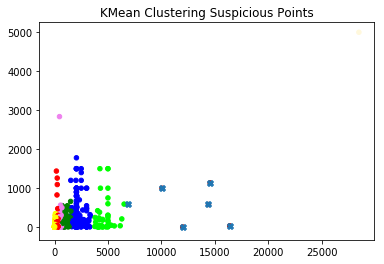

In [19]:
colormap = np.array(['red', 'lime', 'blue','brown','cornsilk','yellow','green','violet'])
markers_on = [7606, 14496, 18806, 18981, 18055, 17026]


plt.scatter(dataset_dummy['bill_amount'], dataset_dummy['Distance in KMs'], c=colormap[kmeans_model.labels_], s=20)
plt.scatter(outlierpoints['bill_amount'], outlierpoints['Distance in KMs'], marker='X')
plt.title("KMean Clustering Suspicious Points")

# The points which are marked as cross marks are the very suspicious data points in the data given and can keep an eye or a triggering alarm when the distance is greater than 2000 and bill amount is above 5000